In [2]:
import glob
import rasterio as rs
from scipy import misc as sm

In [4]:
def compute_peak_swe(df,time = [],resample=False):
    
    swe = dat[:,df.k,df.l]
    df = pd.DataFrame()
    sweP = np.diff(swe)
    swe = swe[1:]
    df['swe'] = swe
    df['sweP'] = sweP
    df['datetime'] = time[1:]
    df.index = pd.DatetimeIndex(df.datetime)
    del df['datetime']

    if resample:
        swe = df.swe.resample('D').max().as_matrix() # resample daily SWE to maximum daily SWE
        sweP = df.sweP.resample('D').min().as_matrix()
        idx = df.resample('D').mean().index

        df = pd.DataFrame()
        df['swe'] = swe
        df['sweP']= sweP
        df.index = idx

    df = df.loc[:df.sweP.idxmin()]
    date = rut.DOWY(df.loc[df.sweP==0].index[-1])

    swe = df.loc[df.sweP==0].swe[-1]

    return swe,date

In [5]:
def populate_output(df):
    out[df.k,df.l] = df.peakswe
    #dates[df.k,df.l] = df.DOWY

In [6]:
#files = glob.glob('./data/jepsen_swe_como/swe_*_como.tiff')
files = glob.glob('/Volumes/hydroData/JepsenData/jepsen_usgspostdoc/D_drive/2010_sem1/swerecon_runs/GLV/*/swe.mdl')

In [7]:
fl = files[0]

In [9]:
fl.split('/')[-2]

['',
 'Volumes',
 'hydroData',
 'JepsenData',
 'jepsen_usgspostdoc',
 'D_drive',
 '2010_sem1',
 'swerecon_runs',
 'GLV',
 '1996',
 'swe.mdl']

In [10]:
years = []
outs = []

for fl in files:
    with rs.open(fl,'r') as ds:
        n = ds.count
        tmp = ds.read(1)
        k,l = tmp.shape
    
        # iterate through the stack and create a numpy array

        dat = np.ndarray((n,k,l)) # depth, height, width
        out = np.ndarray((k,l))
        #dates = out.copy()
        
        for i in range(n):
            dat[i,:,:] = ds.read(i+1)
    
    year = int(fl.split('/')[-2]) # change for actual jepsen data
    time = pd.date_range(start='3-1-%s 00:00:00'%(year),periods=n,freq='h')
    ks = []
    ls = []

    for i in range(k):
        for o in range(l):
            ks.append(i)
            ls.append(o)

    # make a dataframe
    rast = pd.DataFrame()
    rast['k'] = ks
    rast['l'] = ls
    
    res = rast.apply(compute_peak_swe,time=time,resample=False,axis=1)
    peakswe,date = zip(*res)
    rast['peakswe'] = peakswe
    rast['DOWY'] = date
    
    rast.apply(populate_output,axis=1);
    
    outs.append(out)
    years.append(year)
    print year

/Users/barnhatb/Dropbox/python/bin/rhessys/utilities.py:83: FutureWarning: pandas.core.datetools.datetime is deprecated. Please use datetime.datetime instead.
  ref = pd.datetools.datetime(int(wy)-1,10,1) # set the beginning of the water year
/Users/barnhatb/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app


1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007


In [25]:
# generate the peak SWE climatology

h = len(outs)
peakSWE = np.ndarray((k,l),dtype=np.float32)
for out in outs:
    peakSWE[:,:] += out

peakSWE /= h # compute the average peak SWE

(0.0, 400.0, 0.0, 200.0)

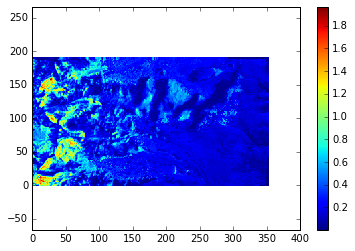

In [26]:
plt.pcolormesh(np.flipud(peakSWE))
plt.colorbar()
plt.axis('equal')

In [30]:
# Export the data:
dstfl = './data/jepsen_peakSWEclimatology.tiff' # newfile

# get the geographic parameters
with rs.open(fl,'r') as ds:
    profile = ds.profile

profile['dtype'] = 'float32'
profile['driver'] = 'GTiff'
profile['count'] = 1
    
# write out the new files
with rs.open(dstfl,'w',**profile) as dst:
    dst.write(peakSWE,1)

In [28]:
profile

{'affine': Affine(30.0, 0.0, 444345.08,
       0.0, -30.0, 4436145.28),
 'count': 4416,
 'crs': CRS({'init': u'epsg:26913'}),
 'driver': u'ENVI',
 'dtype': 'float32',
 'height': 190,
 'interleave': 'band',
 'nodata': None,
 'tiled': False,
 'transform': (444345.08, 30.0, 0.0, 4436145.28, 0.0, -30.0),
 'width': 352}

1.702647686


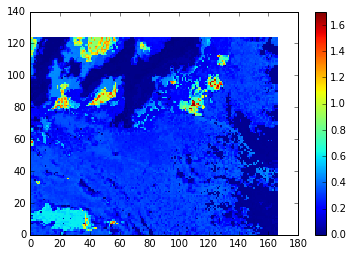

In [214]:
plt.pcolormesh(np.flipud(out))
plt.colorbar()
print out.max()

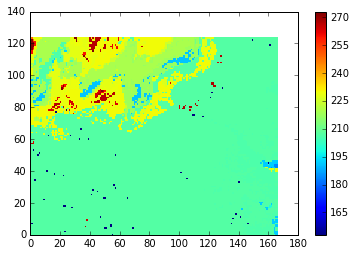

In [215]:
plt.pcolormesh(np.flipud(dates))
plt.colorbar()

In [2]:
import datetime

In [7]:
dt = datetime.timedelta(225-1)
strt = datetime.date(1995,10,1)

In [8]:
strt+dt

datetime.date(1996, 5, 12)

In [216]:
april1 = np.array(ds.read(31*24))

In [217]:
diff = april1-out 

1.06808567047


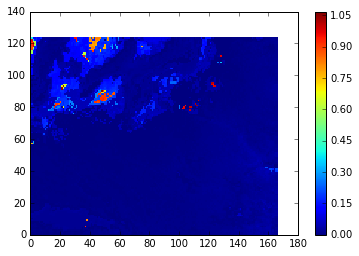

In [218]:
plt.pcolormesh(np.flipud(diff))
plt.colorbar()
print diff.max()

1.93933


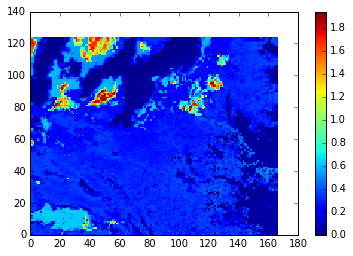

In [219]:
plt.pcolormesh(np.flipud(april1))
plt.colorbar()
print april1.max()

In [149]:
df = pd.DataFrame()
df['swe'] = tmp
df['datetime'] = time
df.index = pd.DatetimeIndex(df.datetime)
del df['datetime']

In [151]:
tmp2 = np.diff(tmp)

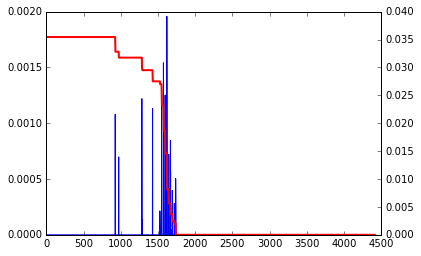

In [160]:
plt.plot(tmp3)
ax = plt.gca()
ax2 = plt.twinx()
ax2.plot(tmp,c='r',lw=2)

In [159]:
tmp3 = np.abs(tmp2)

In [ ]:
idx = np.ma

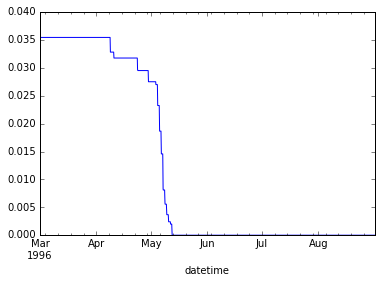

In [150]:
df.swe.plot()

In [ ]:
out = np.ndarray((k,l))

In [111]:
%%timeit -n 30 -r 5
peakswe,date = compute_peak_swe(dat[:,10,30],time,thresh=-0.002,resample=True)

30 loops, best of 5: 7.63 ms per loop


In [117]:
peakswe,date = compute_peak_swe(dat[:,10,30],time,thresh=-0.002,resample=True)
print peakswe
print date

0.520723223686
1996-05-04


In [107]:
%%timeit -n 30 -r 5
compute_peak_swe(dat[:,10,30],time,thresh=-0.002,resample=False)

30 loops, best of 5: 2.96 ms per loop


In [118]:
peakswe,date = compute_peak_swe(dat[:,10,30],time,thresh=-0.002,resample=False)
print peakswe
print date

0.518627941608
1996-05-04


In [ ]:
def run(df,time=time,thresh=thresh,resample=False):
    k = df.k
    l = df.l
    return compute_peak_swe(dat[:,k,l],thresh=thresh,resample=resample)

In [ ]:
df = pd.DataFrame()

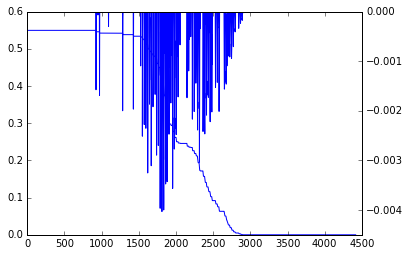

In [35]:
plt.plot(tmp)
ax1 = plt.gca()
ax2 = plt.twinx(ax=ax1) 
ax2.plot(tmp2)

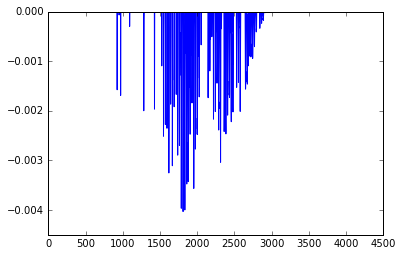

In [33]:
plt.plot(tmp2)

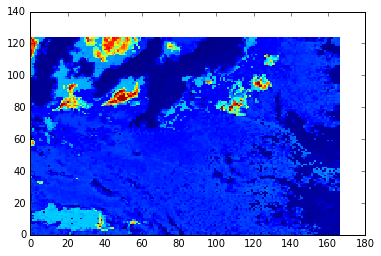

In [12]:
plt.pcolormesh(tmp)